Found 4500 images belonging to 3 classes.
Found 4500 images belonging to 3 classes.
Found 4500 images belonging to 3 classes.
Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_33 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_117 (Conv2D)         (None, 224, 224, 64)      1792      
                                                                 
 conv2d_118 (Conv2D)         (None, 224, 224, 64)      36928     
                                                                 
 conv2d_119 (Conv2D)         (None, 224, 224, 3)       195       
                                                                 
Total params: 38,915
Trainable params: 38,915
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
141/141 [==============================] - 1975s 1

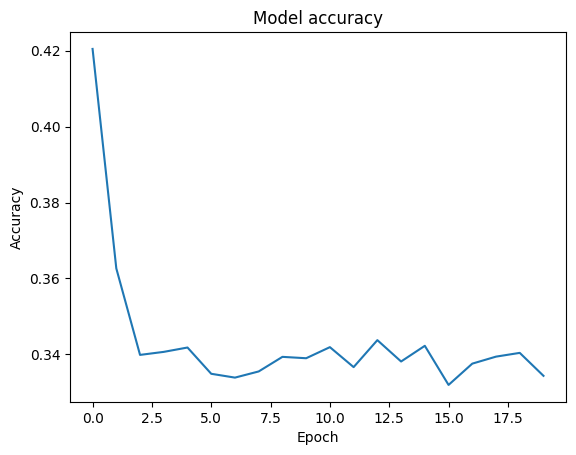

In [80]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, UpSampling2D, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define constants
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 20


train_dir = '/Users/nathan/Desktop/Code/Tomato-disease/training/PlantVillage'
val_dir ='/Users/nathan/Desktop/Code/Tomato-disease/training/PlantVillage'
test_dir ='/Users/nathan/Desktop/Code/Tomato-disease/training/PlantVillage'
# U-Net model
def create_unet_model(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    # Contracting path
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    # ...

    # Expanding path
    up1 = UpSampling2D(size=(2, 2))(conv2)
    up1 = Conv2D(64, 2, activation='relu', padding='same')(up1)
    conv6 = Conv2D(128, 3, activation='relu', padding='same')(up1)
    conv6 = Conv2D(128, 3, activation='relu', padding='same')(conv6)

    up2 = UpSampling2D(size=(2, 2))(conv6)
    up2 = Conv2D(64, 2, activation='relu', padding='same')(up2)
    conv7 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv7 = Conv2D(64, 3, activation='relu', padding='same')(conv7)

    # Output
    outputs = Conv2D(num_classes, (1, 1), activation='sigmoid')(conv7)

    return Model(inputs, outputs)

# Load and preprocess the data
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='input',
    shuffle=True
)
val_datagen = ImageDataGenerator(rescale=1./255)
val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='input',
    shuffle=False
)
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='input',
    shuffle=False
)

# Create the U-Net model
unet_model = create_unet_model(input_shape=(*IMAGE_SIZE, 3), num_classes=3)

# Print the model summary
unet_model.summary()

# Compile the U-Net model
unet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the U-Net model
history = unet_model.fit(
    train_data,
    validation_data=val_data,
    epochs=EPOCHS
)

# Evaluate the U-Net model
test_loss, test_acc = unet_model.evaluate(test_data)

# Plot training accuracy
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()


In [83]:
save_dir = '/Users/nathan/Desktop/Code/U-Net'
os.makedirs(save_dir, exist_ok=True)
unet_model.save(os.path.join(save_dir, 'my_U-Net_model.h5'))